In [4]:
import seaborn as sns; sns.set() 
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  

df_dict = pd.read_excel('C:\\Emory\\Courses\\Fall\\ISOM_672_Business_analytics\\Python\\K_means_Clustering\\HW4.xlsx', sheet_name=None)
df = df_dict['All Data']  


# a
*	(50 points) After exploring the data, build numeric prediction models that predict Spending. Use linear regression, k-NN, and regression tree techniques. Briefly discuss the models you have built. Use cross-validation with 10 folds to estimate the generalization performance. Present the results for each of the three techniques and discuss which one yields the best performance. 


In [5]:
print(df)

      sequence_number  US  source_a  source_c  source_b  source_d  source_e  \
0                   1   1         0         0         1         0         0   
1                   2   1         0         0         0         0         1   
2                   3   1         0         0         0         0         0   
3                   4   1         0         1         0         0         0   
4                   5   1         0         1         0         0         0   
...               ...  ..       ...       ...       ...       ...       ...   
1995             1996   1         0         0         0         0         0   
1996             1997   1         0         0         0         0         0   
1997             1998   1         0         0         0         0         0   
1998             1999   1         0         0         0         0         0   
1999             2000   1         0         0         0         0         0   

      source_m  source_o  source_h  ...  source_x  

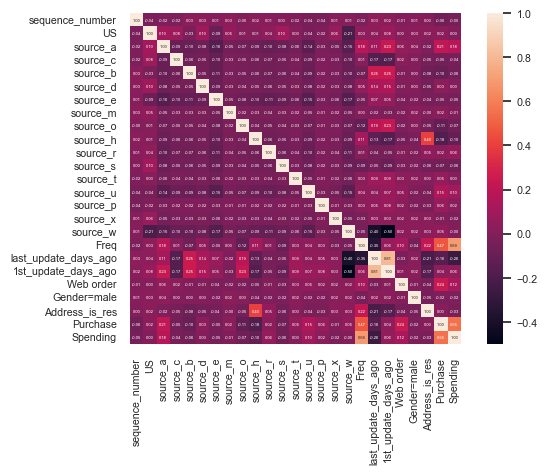

In [6]:
cols = df.columns

cm = np.corrcoef(df[cols].values.T) # returns Pearson product-moment correlation coefficients
                                    # input array_like: each row of x represents a variable, and each column a single observation of all those variables

sns.set(font_scale=0.7)
# Heatmap visualisation of pearson correlation coefficients
# Documentation https://seaborn.pydata.org/generated/seaborn.heatmap.html
hm = sns.heatmap(cm,                # plot rectangular data as a color-encoded matrix
                 cbar=True,         # whether to draw a colorbar
                 annot=True,        # if True, write the data value in each cell
                 square=True,       # if True, set the Axes aspect to “equal” so each cell will be square-shaped
                 fmt='.2f',
                 linewidths= 0,# string formatting code to use when adding annotations
                 annot_kws={'size': 3}, # keyword arguments for ax.text when annot is True (size of font)
                 yticklabels=cols,  # if True, plot the column names of the dataframe.
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('correlation_coefficient.png', dpi=300) # Saves the figure in our local disk
plt.show()

### Single Attribute

In [7]:
from sklearn.linear_model import LinearRegression     # ordinary least squares Linear Regression
from sklearn.model_selection import cross_val_score   # evaluate a score by cross-validation

# A simple linear regression with only one feature
X = df[['Freq']].values                                 # attribute
y = df['Spending'].values                                 # target variable

# linear regression class
slr = LinearRegression(fit_intercept=True,            # whether to calculate the intercept for this model (true by default, otherwise data is expected to be centered)
                       n_jobs=-1)                     # speedup computations by using multiple processors; -1 means use all processors
slr.fit(X, y)                                         # fit model to the data

print('Slope: %.3f' % slr.coef_[0])                   # estimated coefficients for the linear regression model
print('Intercept: %.3f' % slr.intercept_)      

Slope: 91.820
Intercept: -27.548


### Visualize

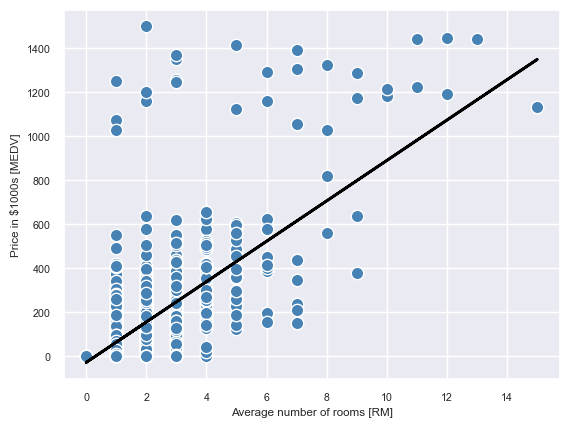

In [8]:
def lin_regplot(X, y, model):                                 # define plot function that takes as input X, y and model
    plt.scatter(X,                                            # a scatter plot of y vs x.
                y,
                c='steelblue',                                # aesthetic parameters
                edgecolor='white',
                s=80)                                         # the marker size in points**2
    plt.plot(X, model.predict(X), color='black', lw=2) #lw = line width
    return

lin_regplot(X, y, slr)       # Call the above function
plt.xlabel('Average number of rooms [RM]')                    # set label for x axis
plt.ylabel('Price in $1000s [MEDV]')                          # set label for y axis

#plt.savefig('images/10_07.png', dpi=300)
plt.show()       

       sequence_number           US     source_a     source_c     source_b  \
count      2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean       1000.500000     0.824500     0.126500     0.056000     0.060000   
std         577.494589     0.380489     0.332495     0.229979     0.237546   
min           1.000000     0.000000     0.000000     0.000000     0.000000   
25%         500.750000     1.000000     0.000000     0.000000     0.000000   
50%        1000.500000     1.000000     0.000000     0.000000     0.000000   
75%        1500.250000     1.000000     0.000000     0.000000     0.000000   
max        2000.000000     1.000000     1.000000     1.000000     1.000000   

          source_d     source_e    source_m     source_o     source_h  ...  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000  ...   
mean      0.041500     0.151000     0.01650     0.033500     0.052500  ...   
std       0.199493     0.358138     0.12742     0.179983     0.

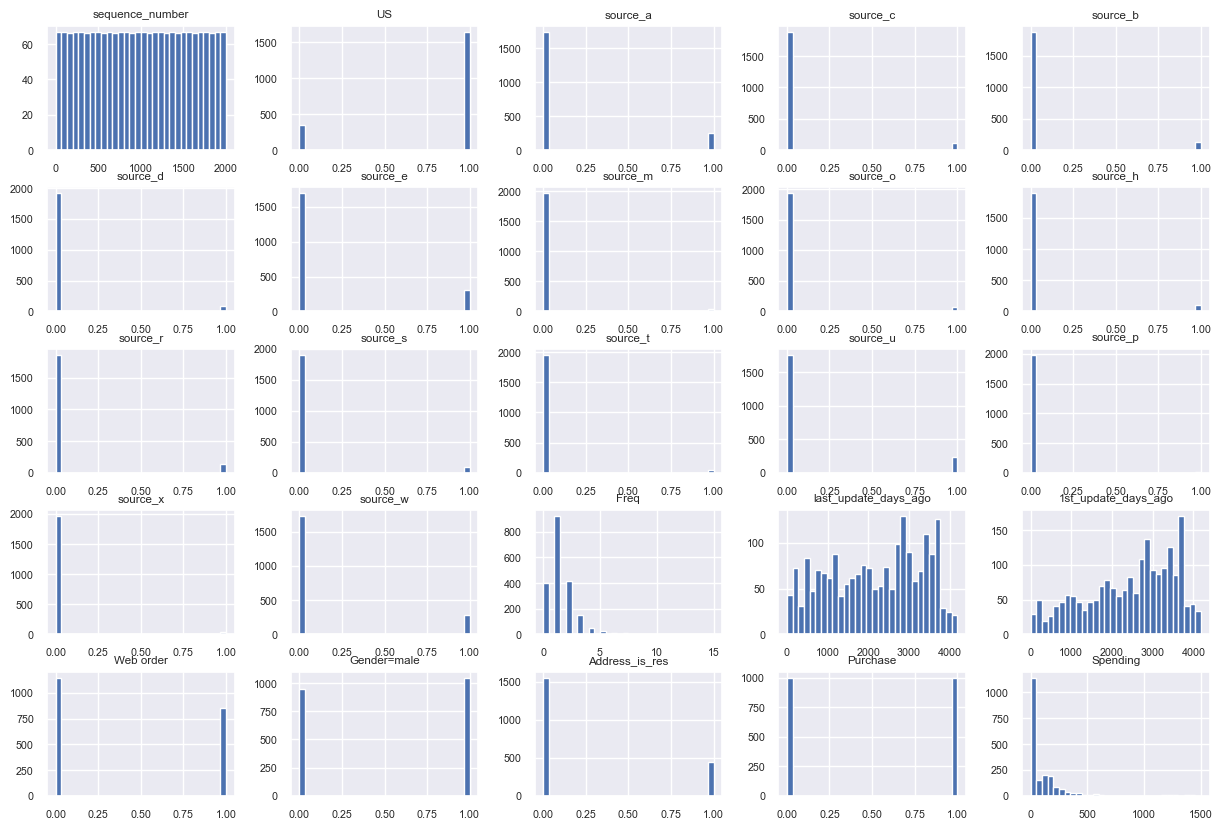

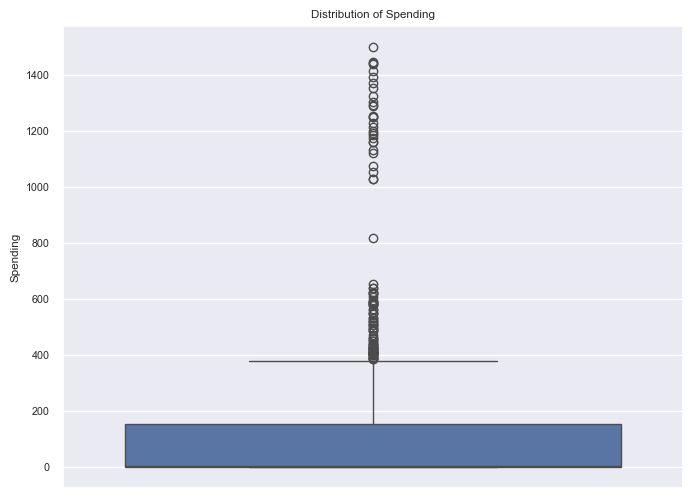

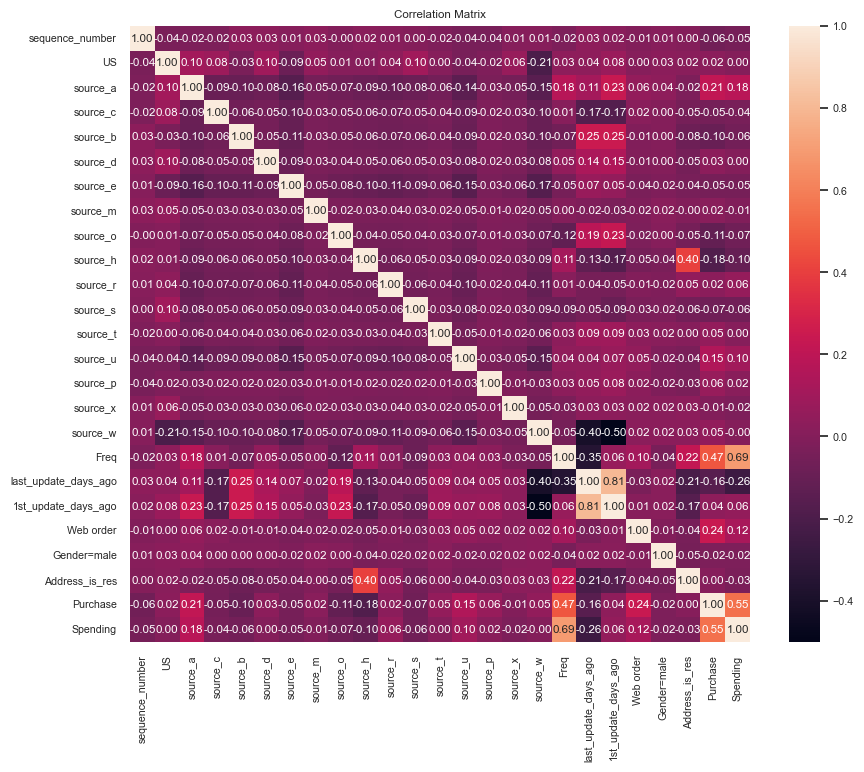

In [9]:
# Descriptive statistics for numerical columns
print(df.describe())
 
# Plot histograms for all features
df.hist(bins=30, figsize=(15, 10))
plt.show()
 
# Boxplot for the target variable ('Spending')
plt.figure(figsize=(8, 6))
sns.boxplot(df['Spending'])
plt.title('Distribution of Spending')
plt.show()
 
# Correlation matrix to understand the relationship between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
 

## Fit Linear Regression

Select only the numeric value to build

In [10]:
from sklearn.model_selection import train_test_split    # split validation class

X = df.iloc[:, :-1].values                              # use all except target variable
y = df['Spending'].values                                   # set last column as target variable

X_train, X_test, y_train, y_test = train_test_split(X,  # split validation
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

slr2 = LinearRegression()                              # linear regression class
slr2.fit(X_train, y_train)                             # fit model to train data
y_train_pred = slr2.predict(X_train)                   # apply model to train data (in sample performance)
y_test_pred = slr2.predict(X_test)                     # apply model to test data (out of sample performance)

print('Slope: %.3f', slr2.coef_)     

Slope: %.3f [-1.71661349e-03 -1.49046310e+00  5.03975826e+00 -5.60364740e+01
 -1.85405414e+01 -5.20141538e+01 -2.42175127e+01 -4.35520736e+01
  8.10960658e+00 -8.13013123e+01  1.16321008e+01 -2.95584972e+01
 -3.04507190e+01 -8.15292307e+00 -6.89514489e+01 -2.18086260e+01
 -1.11927985e+01  7.66759731e+01 -1.69918985e-02  9.30321547e-03
 -1.69962818e+00 -1.47178973e+00 -6.56130231e+01  8.59165340e+01]


## Evaluate

In [11]:
from sklearn.metrics import mean_absolute_error # mean absolute error regression loss
from sklearn.metrics import mean_squared_error  # mean squared error regression loss

# See all regression metrics here http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
print('MSE train: %.3f, test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values
print('MAE train: %.3f, test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) 

MSE train: 14520.069, test: 14829.884
MAE train: 69.945, test: 67.281


## Linear Scaling | Regularlization

* Lasso
* Ridge

### Lasso

In [12]:
from sklearn.linear_model import Lasso # lasso Regression class
from sklearn.preprocessing import StandardScaler

lasso = Lasso(alpha=0.1)   # alpha : constant that multiplies the L1 term, controlling regularization strength
                           # the larger the value of alpha, the more aggressive the penalization is.
                           # alpha defaults to 1.0
                           # alpha = 0 is equivalent to an ordinary least square Linear Regression
                           # alpha is inverse of C, range from 0 to 1, higher the a the stronger the regularization 
                           # optimal alpha ———— nested cross validation 
# Scale features
scaler = StandardScaler()                       # this is where variables are sclaed 
X_train = scaler.fit_transform(X_train)         # computes the mean and std to be used for scaling and performs scaling
                        # fit transform train set, learn the parameters from each featues we have in the data 
X_test = scaler.transform(X_test)               # performs standardization of test set X attributes by centering and scaling

lasso.fit(X_train, y_train)                     # fit model to data     devide by std of each data 
y_train_pred = lasso.predict(X_train)           # apply model to train data  
y_test_pred = lasso.predict(X_test)             # apply model to test data
print(lasso.coef_)   

[ -0.89484597  -0.44508092   3.03455413 -11.62378214  -3.47057071
  -9.57587983  -7.26702118  -4.79590267   2.08502779 -16.77364204
   3.95504655  -5.15652541  -3.68933399  -1.10482287  -5.04853221
  -2.28113288  -2.22456465 112.54161894 -18.78915195   9.45527528
  -0.70295307  -0.62673847 -27.08700364  42.72810721]


##### Evaluation

In [13]:
print('MSE train: %.3f, test: %.3f' % ( # MSE
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred))) # MSE Test Set
                                                  # y_test: Ground truth (correct) target values
                                                  # y_test_pred: Estimated target values
print('MAE train: %.3f, test: %.3f' % ( # MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) #

MSE train: 14521.188, test: 14828.720
MAE train: 70.008, test: 67.284


### Ridge

In [14]:
from sklearn.linear_model import Ridge # ridge Regression class
                                        # when you use lasso and ridge, you have to standardize | we can also use min_max 

ridge = Ridge(alpha=1.0)               # regularization strength; must be a positive float.
                                       # larger values specify stronger regularization.
                                       # alpha corresponds to C^-1 in other linear models such as LogisticRegression

ridge.fit(X_train, y_train)            # fit model (features have been scaled)
y_train_pred = ridge.predict(X_train)  # apply model to train data
y_test_pred = ridge.predict(X_test)    # apply model to test data
print(ridge.coef_)                     # estimated coefficients for the ridge regression model

print('MSE train: %.3f, test: %.3f' % ( #MSE
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred))) # MSE Test Set
                                                  # y_test: Ground truth (correct) target values
                                                  # y_test_pred: Estimated target values
print('MAE train: %.3f, test: %.3f' % ( #MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # MAE Test Set
                                                  

[ -0.98340954  -0.56250538   1.7757125  -12.60968689  -4.51491946
 -10.45141941  -8.80172559  -5.36976827   1.47052529 -17.62914966
   3.04971962  -6.05940314  -4.35589191  -2.50824197  -5.47613168
  -2.90198042  -3.64922211 112.29873024 -19.50635308  10.08473075
  -0.82576252  -0.73720623 -27.11536425  42.95853892]
MSE train: 14520.084, test: 14830.320
MAE train: 69.925, test: 67.259


## Cross-Validation On Linear Regression

* 10 Fold

In [15]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import numpy as np

# Define the KFold object for 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the linear regression model
slr2 = LinearRegression()

# Since this is linear regression with no hyperparameters to tune, the param_grid is empty
param_grid = {}

# Define scoring metrics to optimize for GridSearchCV
scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error)
}

# Set up GridSearchCV for the linear regression model with 10-fold cross-validation
gs = GridSearchCV(estimator=slr2, param_grid=param_grid, cv=kf, scoring=scoring, refit='mse')

# Fit the model using GridSearchCV
gs.fit(X_train, y_train)

# Extract results for the best model
best_mse = gs.cv_results_['mean_test_mse'][gs.best_index_]
best_mae = gs.cv_results_['mean_test_mae'][gs.best_index_]

# Print cross-validated results
print(f"Cross-Validated MSE: {best_mse:.2f}")
print(f"Cross-Validated MAE: {best_mae:.2f}")

# Predict on the test data using the best estimator
y_test_pred = gs.best_estimator_.predict(X_test)

# Calculate RMSE, MAPE, and SSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
sse_test = np.sum((y_test - y_test_pred) ** 2)
non_zero_indices = y_test != 0  # Find indices where y_test is not zero
mape_test = np.mean(np.abs((y_test[non_zero_indices] - y_test_pred[non_zero_indices]) / y_test[non_zero_indices])) * 100

# Print final test set metrics
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAPE: {mape_test:.2f}%")# this does not work for how the data is spread
print(f"Test SSE: {sse_test:.2f}") #this does not work 


Cross-Validated MSE: 15127.03
Cross-Validated MAE: 71.33
Test RMSE: 121.78
Test MAPE: 14976.89%
Test SSE: 8897930.22


## Fitting K-NN

In [16]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features X (columns 1 to 16, 20 to 22) and the target Y (column 23)
X_KNN = df.iloc[:, list(range(0, 21)) + [23]]  # everything but 22
Y_KNN = df.iloc[:, 22]  # 23rd column is the target (Purchase) # for numeric normalize data 

# Split the data into training and testing sets
X_train_KNN, X_test_KNN, Y_train_KNN, Y_test_KNN = train_test_split(
    X_KNN, Y_KNN, test_size=0.3, random_state=42, stratify=Y_KNN)

# Standardize the features
sc = StandardScaler()
sc.fit(X_train_KNN)
X_train_KNN_std = sc.transform(X_train_KNN)
X_test_KNN_std = sc.transform(X_test_KNN)

# Initialize the k-NN classifier
knn = neighbors.KNeighborsClassifier(
    n_neighbors=5,  # Number of neighbors
    p=2,  # Use Minkowski distance with p=2 (Euclidean distance)
    metric='minkowski',
    n_jobs=-1,  # Use all available processors
    weights='uniform'  # All points in each neighborhood are weighted equally
)

# Train the model
knn = knn.fit(X_train_KNN_std, Y_train_KNN)

# Predict on the test set and calculate accuracy (optional)
y_pred_KNN = knn.predict(X_test_KNN_std)


c:\Users\Micheli\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Micheli\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [17]:
############################################# Evaluate the Model #############################################

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics
# and distance computations.
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report #The required functions for evaluation metrics are imported

# Estimate the predicted values by applying the kNN algorithm
y_pred_KNN = knn.predict(X_test_KNN_std)            # make predictions for test set 
                                          # The classifier (knn) makes predictions on the standardized test data
y_pred_insample_KNN = knn.predict(X_train_KNN_std)  # make predictions for train set (for educational purposes, to demonstrate the difference)
                                            # The classifier (knn) makes predictions on the standardized train data

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(Y_test_KNN, y_pred_KNN))        # Accuracy is calculated and printed for both the test (out-of-sample) dataset.
print('Accuracy (in-sample): %.2f' % accuracy_score(Y_train_KNN, y_pred_insample_KNN))  # Accuracy is calculated and printed for both the training (in-sample) dataset.

# F1 score
# The F1 score is a harmonic mean of precision and recall, providing a balance between the two metrics
print('F1 score (out-of-sample): ', f1_score(Y_test_KNN, y_pred_KNN, average='macro'))           # average='macro' calculate metrics for each label, and find their unweighted mean
print('F1 score (in-sample)    : ', f1_score(Y_train_KNN, y_pred_insample_KNN, average='macro')) # The average='macro' argument calculates the metric independently for each class and then takes the average, not considering label imbalance.

# Kappa score
# Cohen's Kappa score measures the agreement between the predictions and the actual values, accounting for the possibility of agreement occurring by chance
# It's especially useful when the classes are imbalanced
print('Kappa score (out-of-sample): ', cohen_kappa_score(Y_test_KNN, y_pred_KNN))                # computes Cohen’s kappa: a statistic that measures inter-annotator agreement
print('Kappa score (in-sample)    : ', cohen_kappa_score(Y_train_KNN, y_pred_insample_KNN))      # (i.e., agreement between predictions and actual values of target variables)

# Build a text report showing the main classification metrics (out-of-sample performance)
# classification_report function provides a comprehensive report displaying key metrics
print(classification_report(Y_test_KNN, y_pred_KNN, target_names=['No Purchase', 'Purchase']))             # builds a text report showing the main classification metrics (precision, recall, f1-score)
                                                                                         # The target_names argument provides names for each of the classes

Accuracy (out-of-sample): 0.82
Accuracy (in-sample): 0.85
F1 score (out-of-sample):  0.6606458107399893
F1 score (in-sample)    :  0.7190635451505016
Kappa score (out-of-sample):  0.34053966845480577
Kappa score (in-sample)    :  0.45086274837383455
              precision    recall  f1-score   support

 No Purchase       0.83      0.96      0.89       467
    Purchase       0.71      0.31      0.43       133

    accuracy                           0.82       600
   macro avg       0.77      0.64      0.66       600
weighted avg       0.80      0.82      0.79       600



### Cross Validation K-NN 

Not necessary

In [18]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Cross-validation setup
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Pipeline with KNeighborsRegressor
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsRegressor(p=2, metric='minkowski'))  # Use KNeighborsRegressor
])

# Parameters to optimize
params = {}

# GridSearchCV for regression
gs_knn = GridSearchCV(estimator=pipe,
                      param_grid=params,
                      scoring='neg_mean_squared_error',  # Use MSE for regression
                      cv=inner_cv)

# Fit the model
gs_knn = gs_knn.fit(X_KNN, Y_KNN)
print("\nCross Validation")
print("Non-nested CV Score (MSE): ", -gs_knn.best_score_)  # MSE is negative in sklearn, so negate it
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)

# Nested cross-validation for regression
nested_score_gs_knn = cross_val_score(gs_knn, X=X_KNN, y=Y_KNN, cv=outer_cv, scoring='neg_mean_squared_error')
print("Nested CV MSE: ", -nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())



Cross Validation
Non-nested CV Score (MSE):  0.15408000000000002
Optimal Parameter:  {}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()), ('knn', KNeighborsRegressor())])
Nested CV MSE:  0.15408000000000002  +/-  0.021874587996120073


## Fit Regression Tree



In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np

#X = df.iloc[:, 17:-5].values  
X = X_KNN = df.iloc[:, list(range(0, 22))].values 
y = df['Spending'].values 

# Initialize the Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Set up the parameter grid for max depth to optimize
param_grid = {'max_depth': range(3, 50)}

# Define scoring metrics to use in cross-validation (MSE and MAE)
scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error)
}

# Set up cross-validation with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV to tune the model
gs_tree = GridSearchCV(estimator=tree, param_grid=param_grid, cv=kf, scoring=scoring, refit='mse')

# Fit the model to the training data
gs_tree.fit(X, y)

# Extract the best parameters and scores
best_mse = gs_tree.cv_results_['mean_test_mse'][gs_tree.best_index_]
best_mae = gs_tree.cv_results_['mean_test_mae'][gs_tree.best_index_]
best_params = gs_tree.best_params_

# Print out the best parameters and cross-validation performance
print(f"Best max depth: {best_params['max_depth']}")
print(f"Cross-Validated MSE: {best_mse:.2f}")
print(f"Cross-Validated MAE: {best_mae:.2f}")


Best max depth: 22
Cross-Validated MSE: 34151.26
Cross-Validated MAE: 87.44


c:\Users\Micheli\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Cross Validation Regression Tree



In [20]:
# NESTED CV

# Set up nested cross-validation
nested_scores = cross_val_score(gs_tree, X=X, y=y, cv=kf, scoring='neg_mean_squared_error')

# Output the nested cross-validation performance
nested_mse = -nested_scores.mean()
nested_std = nested_scores.std()

print(f"Nested CV MSE: {nested_mse:.2f} +/- {nested_std:.2f}")

Nested CV MSE: 31314.60 +/- 9402.20


## Evaluation Regression Tree

In [21]:
# PREDICT ON THE TEST DATA
# Predict using the best estimator from GridSearchCV
y_pred = gs_tree.best_estimator_.predict(X)

# Evaluate the model using MSE, MAE, and RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

# Print test set metrics
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")


Test RMSE: 8.14
Test MAE: 1.42


# b

Engage in feature engineering (i.e., create new features based on existing features) to optimize the performance of linear regression, k-NN, and regression tree techniques. 

Present the results for each of the three techniques (choose the best performing model for each technique in case you try multiple models) and discuss which of the three yields the best performance. 

Use cross-validation with 10 folds to estimate the generalization performance. Discuss whether and why the generalization performance was improved or not.



## Linear Regression Feature Engineering

Validation MSEs:
Linear Regression (degree=1): MSE = 32867.9709
Quadratic Regression (degree=2): MSE = 32608.8703
Cubic Regression (degree=3): MSE = 32488.9800

Test MSEs:
Linear Regression (degree=1): MSE = 35124.3714
Quadratic Regression (degree=2): MSE = 35403.6799
Cubic Regression (degree=3): MSE = 35518.7531


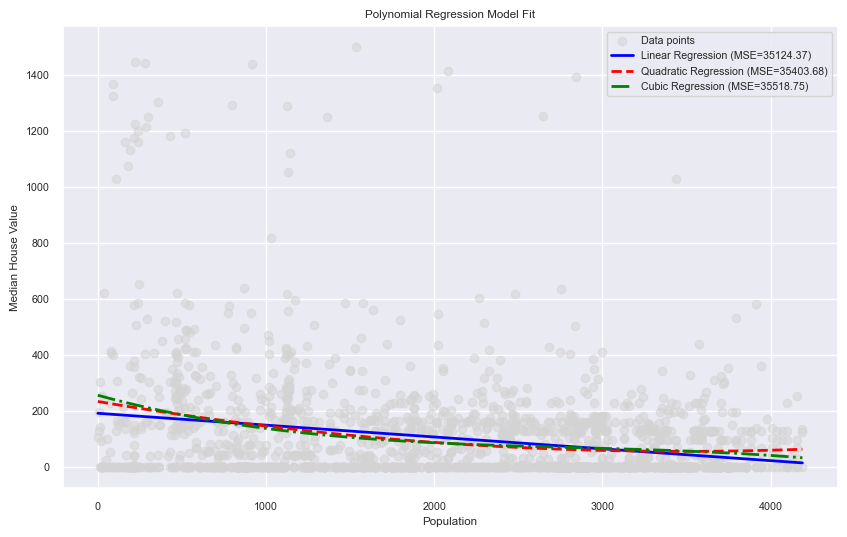

In [22]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df[['last_update_days_ago']].values  # Attribute
y = df['Spending'].values  

# Generate polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

# Split the data into training, validation, and test sets
# First split: temp and test sets
X_temp_lr, X_test_lr, y_temp_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)   # nested holdout testing 
# Second split: training and validation sets
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_temp_lr, y_temp_lr, test_size=0.25, random_state=42) # split the vlidation 
# Now, training:60%, validation:20%, test:20%
# use validation to choose the best model, then apply the best model on the test set to get the generalization performance 


# Transform features for each polynomial degree
# Linear (degree=1)
X_train_lin = X_train_lr
X_val_lin = X_val_lr
X_test_lin = X_test_lr

# Quadratic (degree=2)
X_train_quad = quadratic.fit_transform(X_train_lr)
X_val_quad = quadratic.transform(X_val_lr)
X_test_quad = quadratic.transform(X_test_lr)

# Cubic (degree=3)
X_train_cubic = cubic.fit_transform(X_train_lr)
X_val_cubic = cubic.transform(X_val_lr)
X_test_cubic = cubic.transform(X_test_lr)

# Initialize models
regr_lin = LinearRegression()
regr_quad = LinearRegression()
regr_cubic = LinearRegression()

# Train models on the training set
regr_lin.fit(X_train_lin, y_train_lr)
regr_quad.fit(X_train_quad, y_train_lr)
regr_cubic.fit(X_train_cubic, y_train_lr)

# Predict on the validation set
y_val_pred_lin = regr_lin.predict(X_val_lin)
y_val_pred_quad = regr_quad.predict(X_val_quad)
y_val_pred_cubic = regr_cubic.predict(X_val_cubic)

# Compute MSE on the validation set
mse_val_lin = mean_squared_error(y_val_lr, y_val_pred_lin)
mse_val_quad = mean_squared_error(y_val_lr, y_val_pred_quad)
mse_val_cubic = mean_squared_error(y_val_lr, y_val_pred_cubic)

# Compare validation MSEs
print(f"Validation MSEs:")
print(f"Linear Regression (degree=1): MSE = {mse_val_lin:.4f}")
print(f"Quadratic Regression (degree=2): MSE = {mse_val_quad:.4f}")
print(f"Cubic Regression (degree=3): MSE = {mse_val_cubic:.4f}")

# Combine training and validation sets for final model training
X_train_full_lin = np.vstack((X_train_lin, X_val_lin))
X_train_full_quad = np.vstack((X_train_quad, X_val_quad))
X_train_full_cubic = np.vstack((X_train_cubic, X_val_cubic))
y_train_full = np.hstack((y_train_lr, y_val_lr))

# Retrain models on the combined training and validation set
regr_lin_final = LinearRegression()
regr_lin_final.fit(X_train_full_lin, y_train_full)

regr_quad_final = LinearRegression()
regr_quad_final.fit(X_train_full_quad, y_train_full)

regr_cubic_final = LinearRegression()
regr_cubic_final.fit(X_train_full_cubic, y_train_full)

# Evaluate the models on the test set
y_test_pred_lin = regr_lin_final.predict(X_test_lin)
y_test_pred_quad = regr_quad_final.predict(X_test_quad)
y_test_pred_cubic = regr_cubic_final.predict(X_test_cubic)

mse_test_lin = mean_squared_error(y_test_lr, y_test_pred_lin)
mse_test_quad = mean_squared_error(y_test_lr, y_test_pred_quad)
mse_test_cubic = mean_squared_error(y_test_lr, y_test_pred_cubic)

print(f"\nTest MSEs:")
print(f"Linear Regression (degree=1): MSE = {mse_test_lin:.4f}")
print(f"Quadratic Regression (degree=2): MSE = {mse_test_quad:.4f}")
print(f"Cubic Regression (degree=3): MSE = {mse_test_cubic:.4f}")

# Visualization
X_fit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]

y_fit_lin = regr_lin_final.predict(X_fit)
y_fit_quad = regr_quad_final.predict(quadratic.transform(X_fit))
y_fit_cubic = regr_cubic_final.predict(cubic.transform(X_fit))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points', color='lightgray', alpha=0.5)
plt.plot(X_fit, y_fit_lin, label=f'Linear Regression (MSE={mse_test_lin:.2f})', color='blue', lw=2)
plt.plot(X_fit, y_fit_quad, label=f'Quadratic Regression (MSE={mse_test_quad:.2f})', color='red', lw=2, linestyle='--')
plt.plot(X_fit, y_fit_cubic, label=f'Cubic Regression (MSE={mse_test_cubic:.2f})', color='green', lw=2, linestyle='-.')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.legend(loc='upper right')
plt.title('Polynomial Regression Model Fit')
plt.show()

Validation MSEs:
Linear Regression (degree=1): MSE = 35159.0799
Quadratic Regression (degree=2): MSE = 35161.2641
Cubic Regression (degree=3): MSE = 35163.8798

Test MSEs:
Linear Regression (degree=1): MSE = 37283.1896
Quadratic Regression (degree=2): MSE = 37311.5962
Cubic Regression (degree=3): MSE = 37289.1952


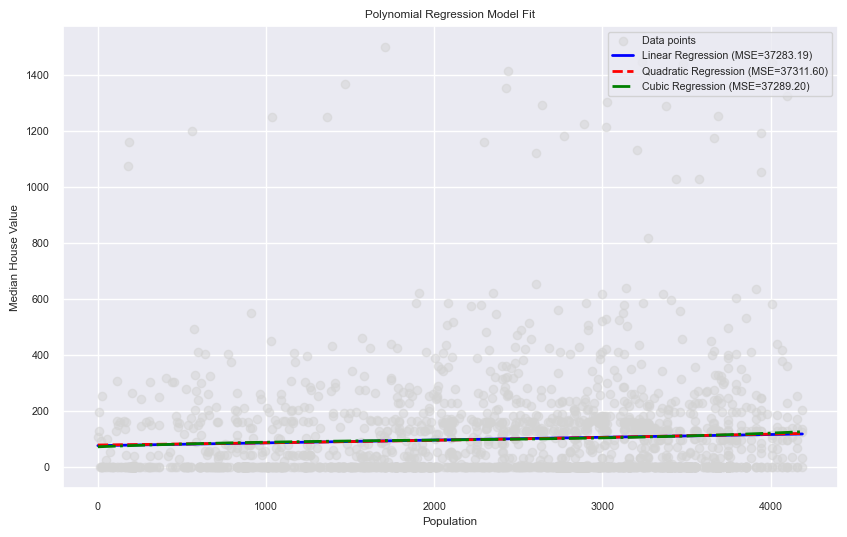

In [23]:

import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df[['1st_update_days_ago']].values  # Attribute
y = df['Spending'].values  

# Generate polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

# Split the data into training, validation, and test sets
# First split: temp and test sets
X_temp_lr, X_test_lr, y_temp_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)   # nested holdout testing 
# Second split: training and validation sets
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_temp_lr, y_temp_lr, test_size=0.25, random_state=42) # split the vlidation 
# Now, training:60%, validation:20%, test:20%
# use validation to choose the best model, then apply the best model on the test set to get the generalization performance 


# Transform features for each polynomial degree
# Linear (degree=1)
X_train_lin = X_train_lr
X_val_lin = X_val_lr
X_test_lin = X_test_lr

# Quadratic (degree=2)
X_train_quad = quadratic.fit_transform(X_train_lr)
X_val_quad = quadratic.transform(X_val_lr)
X_test_quad = quadratic.transform(X_test_lr)

# Cubic (degree=3)
X_train_cubic = cubic.fit_transform(X_train_lr)
X_val_cubic = cubic.transform(X_val_lr)
X_test_cubic = cubic.transform(X_test_lr)

# Initialize models
regr_lin = LinearRegression()
regr_quad = LinearRegression()
regr_cubic = LinearRegression()

# Train models on the training set
regr_lin.fit(X_train_lin, y_train_lr)
regr_quad.fit(X_train_quad, y_train_lr)
regr_cubic.fit(X_train_cubic, y_train_lr)

# Predict on the validation set
y_val_pred_lin = regr_lin.predict(X_val_lin)
y_val_pred_quad = regr_quad.predict(X_val_quad)
y_val_pred_cubic = regr_cubic.predict(X_val_cubic)

# Compute MSE on the validation set
mse_val_lin = mean_squared_error(y_val_lr, y_val_pred_lin)
mse_val_quad = mean_squared_error(y_val_lr, y_val_pred_quad)
mse_val_cubic = mean_squared_error(y_val_lr, y_val_pred_cubic)

# Compare validation MSEs
print(f"Validation MSEs:")
print(f"Linear Regression (degree=1): MSE = {mse_val_lin:.4f}")
print(f"Quadratic Regression (degree=2): MSE = {mse_val_quad:.4f}")
print(f"Cubic Regression (degree=3): MSE = {mse_val_cubic:.4f}")

# Combine training and validation sets for final model training
X_train_full_lin = np.vstack((X_train_lin, X_val_lin))
X_train_full_quad = np.vstack((X_train_quad, X_val_quad))
X_train_full_cubic = np.vstack((X_train_cubic, X_val_cubic))
y_train_full = np.hstack((y_train_lr, y_val_lr))

# Retrain models on the combined training and validation set
regr_lin_final = LinearRegression()
regr_lin_final.fit(X_train_full_lin, y_train_full)

regr_quad_final = LinearRegression()
regr_quad_final.fit(X_train_full_quad, y_train_full)

regr_cubic_final = LinearRegression()
regr_cubic_final.fit(X_train_full_cubic, y_train_full)

# Evaluate the models on the test set
y_test_pred_lin = regr_lin_final.predict(X_test_lin)
y_test_pred_quad = regr_quad_final.predict(X_test_quad)
y_test_pred_cubic = regr_cubic_final.predict(X_test_cubic)

mse_test_lin = mean_squared_error(y_test_lr, y_test_pred_lin)
mse_test_quad = mean_squared_error(y_test_lr, y_test_pred_quad)
mse_test_cubic = mean_squared_error(y_test_lr, y_test_pred_cubic)

print(f"\nTest MSEs:")
print(f"Linear Regression (degree=1): MSE = {mse_test_lin:.4f}")
print(f"Quadratic Regression (degree=2): MSE = {mse_test_quad:.4f}")
print(f"Cubic Regression (degree=3): MSE = {mse_test_cubic:.4f}")

# Visualization
X_fit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]

y_fit_lin = regr_lin_final.predict(X_fit)
y_fit_quad = regr_quad_final.predict(quadratic.transform(X_fit))
y_fit_cubic = regr_cubic_final.predict(cubic.transform(X_fit))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points', color='lightgray', alpha=0.5)
plt.plot(X_fit, y_fit_lin, label=f'Linear Regression (MSE={mse_test_lin:.2f})', color='blue', lw=2)
plt.plot(X_fit, y_fit_quad, label=f'Quadratic Regression (MSE={mse_test_quad:.2f})', color='red', lw=2, linestyle='--')
plt.plot(X_fit, y_fit_cubic, label=f'Cubic Regression (MSE={mse_test_cubic:.2f})', color='green', lw=2, linestyle='-.')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.legend(loc='upper right')
plt.title('Polynomial Regression Model Fit')
plt.show()

Validation MSEs:
Linear Regression (degree=1): MSE = 17206.5369
Quadratic Regression (degree=2): MSE = 16319.9105
Cubic Regression (degree=3): MSE = 16313.2917

Test MSEs:
Linear Regression (degree=1): MSE = 18444.1114
Quadratic Regression (degree=2): MSE = 18124.5316
Cubic Regression (degree=3): MSE = 17731.9763


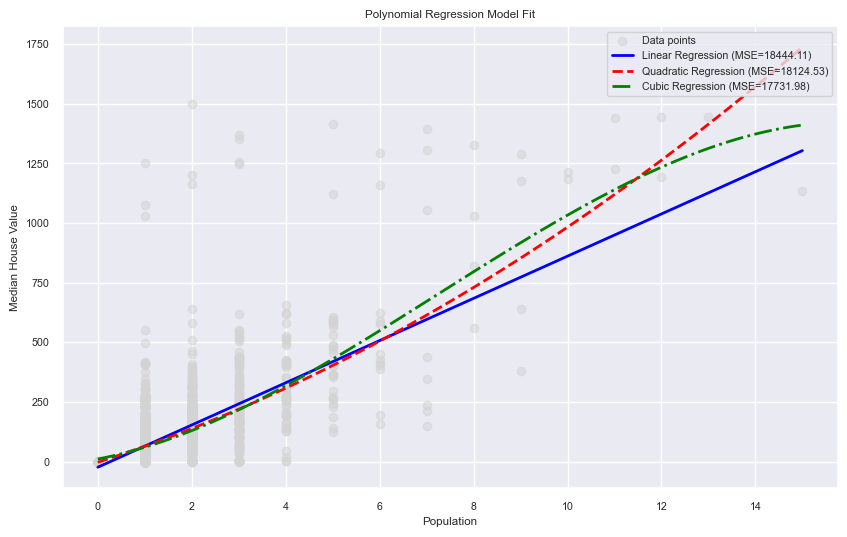

In [24]:

import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df[['Freq']].values  # Attribute
y = df['Spending'].values  

# Generate polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

# Split the data into training, validation, and test sets
# First split: temp and test sets
X_temp_lr, X_test_lr, y_temp_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)   # nested holdout testing 
# Second split: training and validation sets
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_temp_lr, y_temp_lr, test_size=0.25, random_state=42) # split the vlidation 
# Now, training:60%, validation:20%, test:20%
# use validation to choose the best model, then apply the best model on the test set to get the generalization performance 


# Transform features for each polynomial degree
# Linear (degree=1)
X_train_lin = X_train_lr
X_val_lin = X_val_lr
X_test_lin = X_test_lr

# Quadratic (degree=2)
X_train_quad = quadratic.fit_transform(X_train_lr)
X_val_quad = quadratic.transform(X_val_lr)
X_test_quad = quadratic.transform(X_test_lr)

# Cubic (degree=3)
X_train_cubic = cubic.fit_transform(X_train_lr)
X_val_cubic = cubic.transform(X_val_lr)
X_test_cubic = cubic.transform(X_test_lr)

# Initialize models
regr_lin = LinearRegression()
regr_quad = LinearRegression()
regr_cubic = LinearRegression()

# Train models on the training set
regr_lin.fit(X_train_lin, y_train_lr)
regr_quad.fit(X_train_quad, y_train_lr)
regr_cubic.fit(X_train_cubic, y_train_lr)

# Predict on the validation set
y_val_pred_lin = regr_lin.predict(X_val_lin)
y_val_pred_quad = regr_quad.predict(X_val_quad)
y_val_pred_cubic = regr_cubic.predict(X_val_cubic)

# Compute MSE on the validation set
mse_val_lin = mean_squared_error(y_val_lr, y_val_pred_lin)
mse_val_quad = mean_squared_error(y_val_lr, y_val_pred_quad)
mse_val_cubic = mean_squared_error(y_val_lr, y_val_pred_cubic)

# Compare validation MSEs
print(f"Validation MSEs:")
print(f"Linear Regression (degree=1): MSE = {mse_val_lin:.4f}")
print(f"Quadratic Regression (degree=2): MSE = {mse_val_quad:.4f}")
print(f"Cubic Regression (degree=3): MSE = {mse_val_cubic:.4f}")

# Combine training and validation sets for final model training
X_train_full_lin = np.vstack((X_train_lin, X_val_lin))
X_train_full_quad = np.vstack((X_train_quad, X_val_quad))
X_train_full_cubic = np.vstack((X_train_cubic, X_val_cubic))
y_train_full = np.hstack((y_train_lr, y_val_lr))

# Retrain models on the combined training and validation set
regr_lin_final = LinearRegression()
regr_lin_final.fit(X_train_full_lin, y_train_full)

regr_quad_final = LinearRegression()
regr_quad_final.fit(X_train_full_quad, y_train_full)

regr_cubic_final = LinearRegression()
regr_cubic_final.fit(X_train_full_cubic, y_train_full)

# Evaluate the models on the test set
y_test_pred_lin = regr_lin_final.predict(X_test_lin)
y_test_pred_quad = regr_quad_final.predict(X_test_quad)
y_test_pred_cubic = regr_cubic_final.predict(X_test_cubic)

mse_test_lin = mean_squared_error(y_test_lr, y_test_pred_lin)
mse_test_quad = mean_squared_error(y_test_lr, y_test_pred_quad)
mse_test_cubic = mean_squared_error(y_test_lr, y_test_pred_cubic)

print(f"\nTest MSEs:")
print(f"Linear Regression (degree=1): MSE = {mse_test_lin:.4f}")
print(f"Quadratic Regression (degree=2): MSE = {mse_test_quad:.4f}")
print(f"Cubic Regression (degree=3): MSE = {mse_test_cubic:.4f}")

# Visualization
X_fit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]

y_fit_lin = regr_lin_final.predict(X_fit)
y_fit_quad = regr_quad_final.predict(quadratic.transform(X_fit))
y_fit_cubic = regr_cubic_final.predict(cubic.transform(X_fit))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points', color='lightgray', alpha=0.5)
plt.plot(X_fit, y_fit_lin, label=f'Linear Regression (MSE={mse_test_lin:.2f})', color='blue', lw=2)
plt.plot(X_fit, y_fit_quad, label=f'Quadratic Regression (MSE={mse_test_quad:.2f})', color='red', lw=2, linestyle='--')
plt.plot(X_fit, y_fit_cubic, label=f'Cubic Regression (MSE={mse_test_cubic:.2f})', color='green', lw=2, linestyle='-.')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.legend(loc='upper right')
plt.title('Polynomial Regression Model Fit')
plt.show()

### Skewness


Processing variable: Freq
Skewness of Freq: 2.9788
Skewness of log(Freq): 0.2342


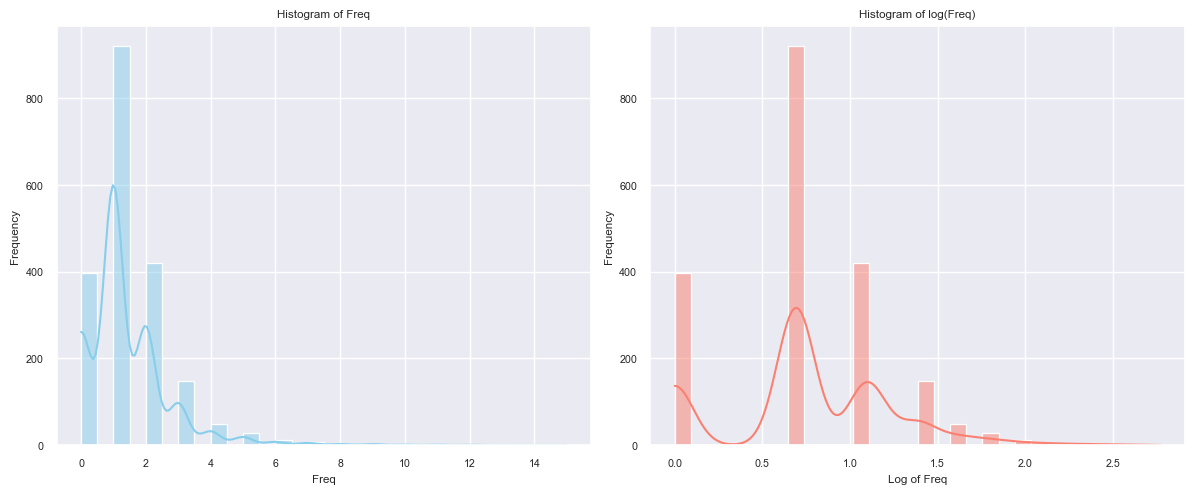


Processing variable: last_update_days_ago
Skewness of last_update_days_ago: -0.1877
Skewness of log(last_update_days_ago): -2.0329


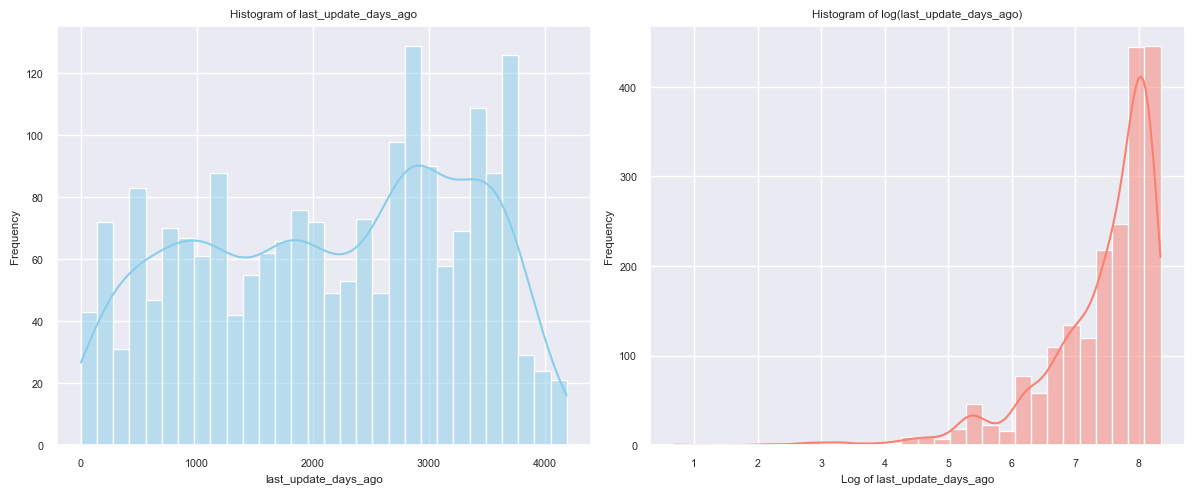


Processing variable: 1st_update_days_ago
Skewness of 1st_update_days_ago: -0.4892
Skewness of log(1st_update_days_ago): -2.6666


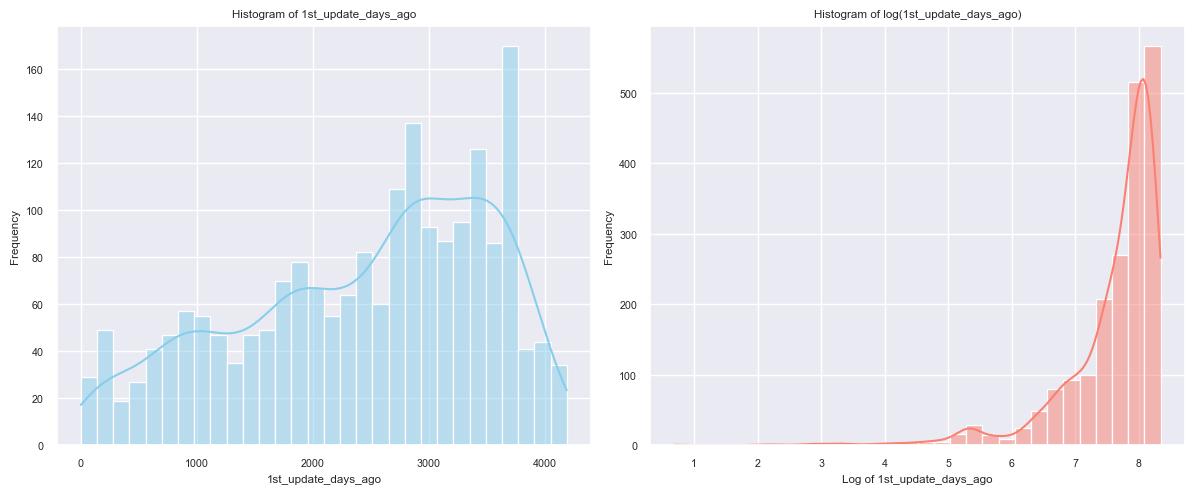

In [25]:
#The necessary libraries are imported
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, shapiro, probplot   # for skewnesss specifically 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# List of three numeric variables (column names) to iterate through
numeric_vars = ['Freq', 'last_update_days_ago', '1st_update_days_ago']  

# Initialize dictionaries to store results for each variable
results = {}

# Loop through each numeric variable
for var in numeric_vars:
    print(f"\nProcessing variable: {var}")
    
    # Get X values for the current numeric variable
    X = df[[var]].values  # Extract column for the current variable
    y = df['Spending'].values  # Target variable (Spending)
    # Code above are generated by GPT, I was unable to figure out how to loop variables 
    # Below are code from the class sample file and edited 
    
    # Flatten X from a 2D array to a 1D array for analysis
    X_flat = X.squeeze()
    
    # Calculate skewness of X
    skewness_X = skew(X_flat)
    print(f"Skewness of {var}: {skewness_X:.4f}")
    
    # Plot histogram of X
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(X_flat, kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    # Apply logarithmic transformation to X to reduce skewness
    X_log = np.log(X_flat + 1)  # Add 1 to avoid taking log of 0
    
    # Calculate skewness of log(X)
    skewness_X_log = skew(X_log)
    print(f"Skewness of log({var}): {skewness_X_log:.4f}")
    
    # Plot histogram of log(X)
    plt.subplot(1, 2, 2)
    sns.histplot(X_log, kde=True, bins=30, color='salmon')
    plt.title(f'Histogram of log({var})')
    plt.xlabel(f'Log of {var}')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Reshape X and X_log back to 2D arrays for sklearn
    X_reshaped = X_flat.reshape(-1, 1)
    X_log_reshaped = X_log.reshape(-1, 1)
    
    # Split the data into training, validation, and test sets
    # First split: temp and test sets (80% temp, 20% test)
    X_temp, X_test, y_temp, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=0)
    X_log_temp, X_log_test, _, _ = train_test_split(X_log_reshaped, y, test_size=0.2, random_state=0)
    
    # Second split: training and validation sets (60% train, 20% val from temp)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)
    X_log_train, X_log_val, _, _ = train_test_split(X_log_temp, y_temp, test_size=0.25, random_state=0)
    
    # Store the data splits for the variable in a dictionary for future use
    results[var] = {
        'X_train': X_train,
        'X_val': X_val,
        'X_test': X_test,
        'X_log_train': X_log_train,
        'X_log_val': X_log_val,
        'X_log_test': X_log_test,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test
    }

# We only need to log Freq


## New Linear Regression 



### Correlation Graph

to figure out interactions

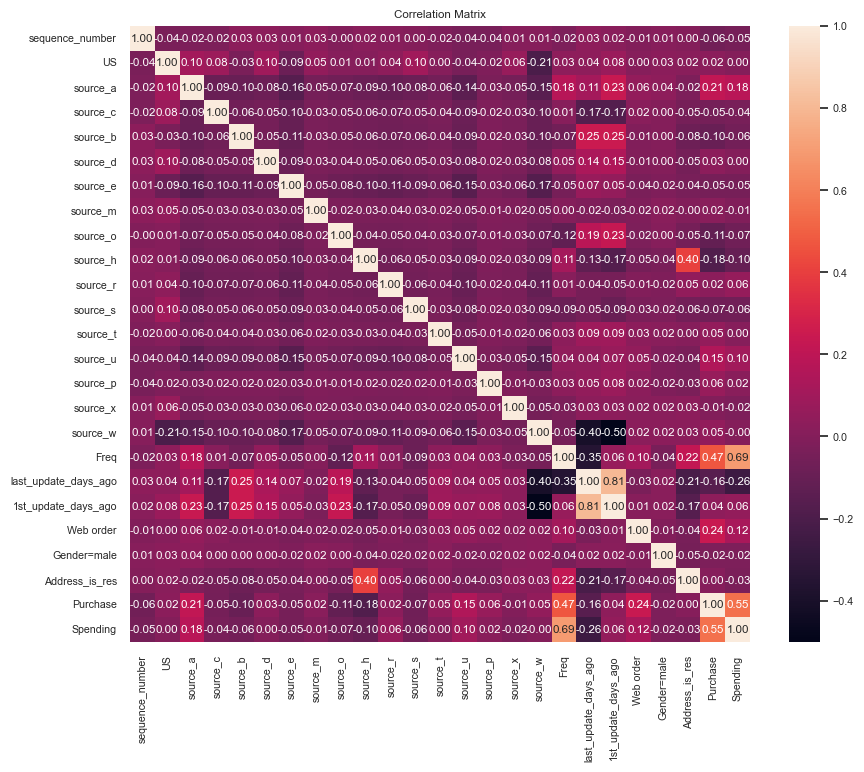

In [26]:
# Correlation matrix to understand the relationship between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## interaction: 

* Threshold +/-0.3

* Address_is_res & source_h —— 0.40 X
* Purchase & Freq —— 0.47
* 1st_update_days_ago & last_update_days_ago —— 0.81  X
* last_update_days_ago & Freq —— -0.35
* last_update_days_ago & source_x —— -0.40 X
* 1st_update_days_ago & source_w —— -0.50 X

#### Useful X variables 

* Freq
* source_a 
* source_u
* source_h
* last_update_days_ago
* Web order
* Purchase



In [27]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Log-transform the Freq variable
df['log_Freq'] = np.log(df['Freq'] + 1)  # Add 1 to avoid log(0)

# Create interaction terms using log(Freq)
df['interaction_Purchase_log_Freq'] = df['Purchase'] * df['log_Freq']
df['interaction_last_update_log_Freq'] = df['last_update_days_ago'] * df['log_Freq']

# Define features and target (Remove low-correlation features like Address_is_res, source_h, and remove multicollinear features)
X = df[['source_a','source_u','source_h','Web order', 'Purchase', 'log_Freq', 'last_update_days_ago', 
        'interaction_Purchase_log_Freq', 'interaction_last_update_log_Freq']]

y = df['Spending']  # Target variable

# Generate polynomial features for numeric columns (using log(Freq), last_update_days_ago, and 1st_update_days_ago)
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = polynomial_features.fit_transform(X[['log_Freq', 'last_update_days_ago']])

# Combine polynomial features with interaction terms
X_combined = np.hstack([X_poly, X[['interaction_Purchase_log_Freq', 
                                   'interaction_last_update_log_Freq']].values])

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Split the data into training, validation, and test sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Lasso regression with regularization to control overfitting
lasso_model = Lasso(alpha=0.7)  # give us best low MSE

# Train the model
lasso_model.fit(X_train_lr, y_train_lr)

# Evaluate the model on the test set
y_test_pred = lasso_model.predict(X_test_lr)

# Calculate MSE on the test set
mse_test_final = mean_squared_error(y_test_lr, y_test_pred)

print(f"\nFinal Test MSE: {mse_test_final:.4f}")

# Print the coefficients of the model
print("Coefficients of the final model:", lasso_model.coef_)



Final Test MSE: 13917.2414
Coefficients of the final model: [ -0.          -8.23645032 -49.87218859  -0.           0.
 118.17341007 -40.66369139  24.3426179   -0.          98.08918781
  -0.        ]


## Final Model

In [28]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Log-transform the Freq variable
df['log_Freq'] = np.log(df['Freq'] + 1)  # Add 1 to avoid log(0)

# Create interaction terms using log(Freq)
df['interaction_Purchase_log_Freq'] = df['Purchase'] * df['log_Freq']
df['interaction_last_update_log_Freq'] = df['last_update_days_ago'] * df['log_Freq']

# Define features and target (Remove low-correlation features like Address_is_res, source_h, and remove multicollinear features)
X = df[['source_a', 'source_u', 'source_h', 'Web order', 'Purchase', 'log_Freq', 'last_update_days_ago', 
        'interaction_Purchase_log_Freq', 'interaction_last_update_log_Freq']]

y = df['Spending']  # Target variable

# Generate polynomial features for numeric columns (using log(Freq), last_update_days_ago)
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = polynomial_features.fit_transform(X[['log_Freq', 'last_update_days_ago']])

# Combine polynomial features with interaction terms
X_combined = np.hstack([X_poly, X[['interaction_Purchase_log_Freq', 
                                   'interaction_last_update_log_Freq']].values])

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Perform Lasso regression to identify non-zero coefficients
lasso_model = Lasso(alpha=0.7) # gives us best low MSE
lasso_model.fit(X_scaled, y)

# Get indices of non-zero coefficients
coefficients = lasso_model.coef_
non_zero_features = [i for i, coef in enumerate(coefficients) if coef != 0]

print(f"Number of non-zero features: {len(non_zero_features)}")
print(f"Indices of non-zero features: {non_zero_features}")

# Keep only non-zero features
X_non_zero = X_scaled[:, non_zero_features]

# Split the data into training, validation, and test sets (using only non-zero features)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_non_zero, y, test_size=0.2, random_state=42)

# Retrain the model with only non-zero features
lasso_model_non_zero = Lasso(alpha=0.7)
lasso_model_non_zero.fit(X_train_lr, y_train_lr)

# Evaluate the model on the test set
y_test_pred = lasso_model_non_zero.predict(X_test_lr)

# Calculate MSE on the test set
mse_test_final = mean_squared_error(y_test_lr, y_test_pred)

rmse_test_final = np.sqrt(mse_test_final)

print(f"\nFinal Test MSE: {mse_test_final:.4f}")
print(f"Final Test RMSE: {rmse_test_final:.4f}")

# Print the coefficients of the final model
print("Coefficients of the final model:", lasso_model_non_zero.coef_)

Number of non-zero features: 6
Indices of non-zero features: [1, 2, 5, 6, 7, 9]

Final Test MSE: 13917.2398
Final Test RMSE: 117.9714
Coefficients of the final model: [ -8.23600699 -49.86953601 118.17147279 -40.66429119  24.34255287
  98.08894981]


### Lasso Regression Equation

$$
\hat{y} = -8.24 \cdot \text{source\_u} - 49.87 \cdot \text{source\_h} + 
118.17 \cdot \log(\text{Freq}) - 40.66 \cdot \text{last\_update\_days\_ago} 
+ 24.34 \cdot \text{interaction\_Purchase\_log\_Freq} + 98.09 \cdot \text{interaction\_last\_update\_log\_Freq}
$$


## K-NN Feature Engineering 

In [29]:
##################################### kNN Regressor Example    #####################################
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

X = df.iloc[:, :-1].values  # Use all except target variable
y = df['Spending'].values 

# Split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data with MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(x_train)  # Learn the scaling parameters from training data

x_train_scaled = sc.transform(x_train)  # Apply scaling to training data
x_train_sc = pd.DataFrame(x_train_scaled)  # Construct DataFrame

x_test_scaled = sc.transform(x_test)  # Apply scaling to test data
x_test_sc = pd.DataFrame(x_test_scaled)  # Construct DataFrame

# 3NN Regressor
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors=3)

# Fit and Evaluate Model
knn_regressor.fit(x_train_sc, y_train)  # Fit the model
pred = knn_regressor.predict(x_test_sc)  # Make prediction on test set
error = sqrt(mean_squared_error(y_test, pred))  # Calculate RMSE on test set

print('RMSE value is:', error)


RMSE value is: 130.2325134632072


In [30]:
##################################### Optimize kNN Regressor Example       #####################################
# Pipeline of transforms with a final estimator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

params = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
          'knn__p': [1, 2]}  # Manhattan distance (p=1), Euclidean distance (p=2)

pipe = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsRegressor())
      ])

# Inner CV
knn2_optk = GridSearchCV(pipe,
                         params,
                         cv=5,  # Specify cross-validation folds
                         scoring='neg_mean_squared_error',
                         n_jobs=-1)
knn2_optk.fit(X, y)

# Take the absolute value of the best score (which is MSE) and convert to RMSE
best_mse = abs(knn2_optk.best_score_)
best_rmse = np.sqrt(best_mse)

print(f"Best Non-nested RMSE: {best_rmse:.2f}")
print(f"Best Params: {knn2_optk.best_params_}")
print(f"Best Estimator: {knn2_optk.best_estimator_}")

# Outer CV
nested_scores = cross_val_score(knn2_optk,
                                X=X,
                                y=y,
                                scoring='neg_mean_squared_error',  # MSE returned as negative
                                cv=5)  # Specify cross-validation folds

# Convert to RMSE: take the absolute value and square root
nested_rmse_scores = np.sqrt(abs(nested_scores))
mean_nested_rmse = np.mean(nested_rmse_scores)
std_nested_rmse = np.std(nested_rmse_scores)

print(f"Nested RMSE Mean: {mean_nested_rmse:.2f} +/- {std_nested_rmse:.2f}")


Best Non-nested RMSE: 72.34
Best Params: {'knn__n_neighbors': 3, 'knn__p': 2}
Best Estimator: Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=3))])
Nested RMSE Mean: 71.78 +/- 8.93


All features are selected plus all new columns generated from previous steps are included. This model includes interaction between variables and log1(Freq). This might introduce overfitting. However it is beyond our current scope of research. We might want to use PCA to do dimension reduction in the future to make better prediction and reduce the complexity of data while minimizing the loss of information

## Regression Tree

The regression Tree looks extremely good when including all features to predict Spending

After done feature engineering for both linear regression and K-NN, we found the RMSE worse than the regression tree model we built. The target variable spending is in fact a continuous variable while it automatically helps us select variables for predicting the target variable. Therefore, we would pick regression tree as our best model for predicting target variable spending

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np

#X = df.iloc[:, 17:-5].values  
X = df.iloc[:, :-1].values 
y = df['Spending'].values 

# Initialize the Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Set up the parameter grid for max depth to optimize
param_grid = {'max_depth': range(3, 50)}

# Define scoring metrics to use in cross-validation (MSE and MAE)
scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error)
}

# Set up cross-validation with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV to tune the model
gs_tree = GridSearchCV(estimator=tree, param_grid=param_grid, cv=kf, scoring=scoring, refit='mse')

# Fit the model to the training data
gs_tree.fit(X, y)

# Extract the best parameters and scores
best_mse = gs_tree.cv_results_['mean_test_mse'][gs_tree.best_index_]
best_mae = gs_tree.cv_results_['mean_test_mae'][gs_tree.best_index_]
best_params = gs_tree.best_params_

# Print out the best parameters and cross-validation performance
print(f"Best max depth: {best_params['max_depth']}")
print(f"Cross-Validated MSE: {best_mse:.2f}")
print(f"Cross-Validated MAE: {best_mae:.2f}")

Best max depth: 3
Cross-Validated MSE: 893.11
Cross-Validated MAE: 16.79


In [32]:
# NESTED CV

# Set up nested cross-validation
nested_scores = cross_val_score(gs_tree, X=X, y=y, cv=kf, scoring='neg_mean_squared_error')

# Output the nested cross-validation performance
nested_mse = -nested_scores.mean()
nested_std = nested_scores.std()

print(f"Nested CV MSE: {nested_mse:.2f} +/- {nested_std:.2f}")


Nested CV MSE: 893.11 +/- 389.76


In [33]:
# PREDICT ON THE TEST DATA
# Predict using the best estimator from GridSearchCV
y_pred = gs_tree.best_estimator_.predict(X)

# Evaluate the model using MSE, MAE, and RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

# Print test set metrics
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")


Test RMSE: 28.14
Test MAE: 16.36


## C Parameter Optimizing


In [34]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

## Linear Regression HyperParameter Tuning

In [48]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and 'Spending' is your target variable

# Log-transform the Freq variable
df['log_Freq'] = np.log(df['Freq'] + 1)  # Add 1 to avoid log(0)

# Create interaction terms using log(Freq)
df['interaction_Purchase_log_Freq'] = df['Purchase'] * df['log_Freq']
df['interaction_last_update_log_Freq'] = df['last_update_days_ago'] * df['log_Freq']

# Define features and target (Remove low-correlation and multicollinear features)
X = df[['source_a', 'source_u', 'Web order', 'Purchase', 'log_Freq', 'last_update_days_ago', 
        'interaction_Purchase_log_Freq', 'interaction_last_update_log_Freq']]

y = df['Spending']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000, random_state=42))
])

# Define the parameter grid to optimize
param_grid = {
    'poly_features__degree': [1, 2, 3],  # Degrees of polynomial features to try
    'lasso__alpha': np.logspace(-3, 1, 10)  # Alpha values from 0.001 to 10
}

# Define the scoring metric
scoring = 'neg_mean_squared_error'

# Initialize GridSearchCV to tune the model
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=10,
    scoring=scoring,
    n_jobs=-1
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Extract the best parameters and scores
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Access the best estimator
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse_test_final = mean_squared_error(y_test, y_pred)
rmse_test_final = np.sqrt(mse_test_final)
mae_test_final = mean_absolute_error(y_test, y_pred)

print(f"Final Test MSE: {mse_test_final:.4f}")
print(f"Final Test RMSE: {rmse_test_final:.4f}")
print(f"Final Test MAE: {mae_test_final:.4f}")

# Print the coefficients of the final model
coefficients = best_model.named_steps['lasso'].coef_
feature_names = best_model.named_steps['poly_features'].get_feature_names_out(X.columns)
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("\nCoefficients of the final model:")
print(coeff_df)


Best parameters: {'lasso__alpha': np.float64(3.593813663804626), 'poly_features__degree': 3}
Final Test MSE: 14335.7736
Final Test RMSE: 119.7321
Final Test MAE: 50.2988

Coefficients of the final model:
                                               Feature  Coefficient
0                                             source_a    -0.000000
1                                             source_u     0.000000
2                                            Web order     0.000000
3                                             Purchase     0.003176
4                                             log_Freq     0.000000
..                                                 ...          ...
159  last_update_days_ago interaction_last_update_l...    -0.000000
160                    interaction_Purchase_log_Freq^3     0.114420
161  interaction_Purchase_log_Freq^2 interaction_la...    -0.000000
162  interaction_Purchase_log_Freq interaction_last...    -0.000000
163                 interaction_last_update_log_

## K-NN

In [47]:
##################################### Optimize kNN Regressor Example       #####################################
# Pipeline of transforms with a final estimator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

params = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
          'knn__p': [1, 2]}  # Manhattan distance (p=1), Euclidean distance (p=2)

pipe = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsRegressor())
      ])

# Inner CV
knn2_optk = GridSearchCV(pipe,
                         params,
                         cv=10,  # Specify cross-validation folds
                         scoring='neg_mean_squared_error',
                         n_jobs=-1)
knn2_optk.fit(X, y)

# Take the absolute value of the best score (which is MSE) and convert to RMSE
best_mse = abs(knn2_optk.best_score_)
best_rmse = np.sqrt(best_mse)

print(f"Best Non-nested RMSE: {best_rmse:.2f}")
print(f"Best Params: {knn2_optk.best_params_}")
print(f"Best Estimator: {knn2_optk.best_estimator_}")

# Outer CV
nested_scores = cross_val_score(knn2_optk,
                                X=X,
                                y=y,
                                scoring='neg_mean_squared_error',  # MSE returned as negative
                                cv=10)  # Specify cross-validation folds

# Convert to RMSE: take the absolute value and square root
nested_rmse_scores = np.sqrt(abs(nested_scores))
mean_nested_rmse = np.mean(nested_rmse_scores)
std_nested_rmse = np.std(nested_rmse_scores)

print(f"Nested RMSE Mean: {mean_nested_rmse:.2f} +/- {std_nested_rmse:.2f}")


Best Non-nested RMSE: 71.73
Best Params: {'knn__n_neighbors': 4, 'knn__p': 2}
Best Estimator: Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=4))])
Nested RMSE Mean: 72.49 +/- 9.33


## Regression Tree

In [46]:
############################## Regression Tree Parameter Tuning ##############################
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np

# Features and target variable
X = df.iloc[:, :-1].values  
y = df['Spending'].values 

# Initialize the Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Set up the parameter grid to optimize
param_grid = {
    'max_depth': range(3, 21, 2),
    'min_samples_split': range(2, 11, 2),
    'min_samples_leaf': range(1, 6)
}

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error)
}

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV
gs_tree = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=kf,
    scoring=scoring,
    refit='mse',
    return_train_score=True
)

# Fit the model
gs_tree.fit(X, y)

# Best parameters and scores
best_params = gs_tree.best_params_
best_mse = gs_tree.cv_results_['mean_test_mse'][gs_tree.best_index_]
best_mae = gs_tree.cv_results_['mean_test_mae'][gs_tree.best_index_]

print(f"Best parameters: {best_params}")
print(f"Cross-Validated MSE: {best_mse:.2f}")
print(f"Cross-Validated MAE: {best_mae:.2f}")

# Evaluate on test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

best_tree_model = gs_tree.best_estimator_
best_tree_model.fit(X_train, y_train)
y_pred = best_tree_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

print(f"\nTest MSE: {test_mse:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-Validated MSE: 893.11
Cross-Validated MAE: 16.79

Test MSE: 565.79
Test MAE: 13.71
Test RMSE: 23.79
